## Imports

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt
import qcodes
print(qcodes.__version__)

# Import QCoDeS specific packages
import qcodes as qc

from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.sqlite.database import initialise_database
from qcodes.dataset.experiment_container import (Experiment,
                                                 load_last_experiment,
                                                 new_experiment)
from qcodes import load_by_id, load_by_run_spec
from qcodes.dataset.plotting import plot_dataset

from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.data_export import get_data_by_id,flatten_1D_data_for_plot
from qcodes.dataset.experiment_container import load_experiment_by_name, new_experiment

from qcodes.instrument.base import Instrument
from qcodes.dataset.legacy_import import import_dat_file


0.14.0


## DATA Loading

In [46]:
qc.config['core']['db_location'] = r"C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db"


<IPython.core.display.Javascript object>


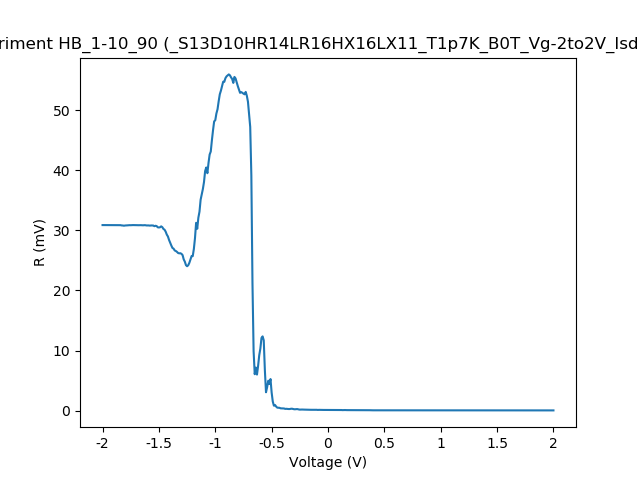

<IPython.core.display.Javascript object>


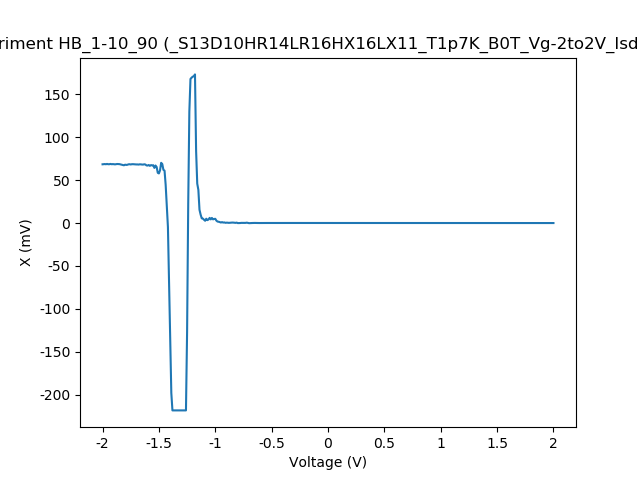

([<matplotlib.axes._subplots.AxesSubplot at 0x169c8870208>,
 [None, None])

In [56]:
dataset_id = 92
ds = load_by_id(dataset_id)
plot_dataset(ds)

#plot_by_id(11)

## Try to import data and timestamp

In [33]:
# Constants
Go = 7.7480917310e-5 # Quantum Conductance Unit
Vsd = 1e-3 # Source-Drain Voltage, V
Offset = 1    # Off set value to fit with DC Conductance

# load data
data_fw = get_data_by_id(77)
data_bw = get_data_by_id(78)

# Sweep Forward 
# Gate Voltage in V
print(data_fw[0][0]['name'])
print(data_fw[0][0]['data'])
Vg_fw = data_fw[0][0]['data']
# Current in A
print(data_fw[0][1]['name'])
print(data_fw[0][1]['data'])
I_fw = data_fw[0][1]['data']
#Calculate conductance in 2e2/h
Geh_fw =[(x / Vsd / Go) * Offset for x in I_fw]
Gsi_fw = [x * Go for x in Geh_fw]

# Sweep Backwards
# Gate Voltage in V
print(data_bw[0][0]['name'])
print(data_bw[0][0]['data'])
Vg_bw = data_bw[0][0]['data']
# Current in A
print(data_bw[0][1]['name'])
print(data_bw[0][1]['data'])
I_bw = data_bw[0][1]['data']
#Calculate conductance in 2e2/h
Geh_bw =[(x / Vsd / Go) * Offset for x in I_bw]
Gsi_bw = [x * Go for x in Geh_bw]

# Sort ascending by voltage 
# Sweep Forward 
idx = np.argsort(Vg_fw)
Vg_fw = np.array(Vg_fw)[idx]
I_fw = np.array(I_fw)[idx]
Geh_fw = np.array(Geh_fw)[idx]
Gsi_fw = np.array(Gsi_fw)[idx]
# Sweep Backwards
idx = np.argsort(Vg_bw)
Vg_bw = np.array(Vg_bw)[idx]
I_bw = np.array(I_bw)[idx]
Geh_bw = np.array(Geh_bw)[idx]
Gsi_bw = np.array(Gsi_bw)[idx]

# Create the Dictionary
log = {}

KL_smub_volt
[-1.00006e+00 -9.95089e-01 -9.90083e-01 -9.85085e-01 -9.80063e-01
 -9.75069e-01 -9.70055e-01 -9.65076e-01 -9.60077e-01 -9.55079e-01
 -9.50065e-01 -9.45057e-01 -9.40084e-01 -9.35080e-01 -9.30071e-01
 -9.25057e-01 -9.20063e-01 -9.15050e-01 -9.10086e-01 -9.05075e-01
 -9.00071e-01 -8.95055e-01 -8.90055e-01 -8.85044e-01 -8.80076e-01
 -8.75067e-01 -8.70062e-01 -8.65065e-01 -8.60060e-01 -8.55087e-01
 -8.50077e-01 -8.45065e-01 -8.40062e-01 -8.35067e-01 -8.30060e-01
 -8.25086e-01 -8.20076e-01 -8.15065e-01 -8.10059e-01 -8.05053e-01
 -8.00059e-01 -7.95087e-01 -7.90086e-01 -7.85067e-01 -7.80055e-01
 -7.75057e-01 -7.70072e-01 -7.65083e-01 -7.60073e-01 -7.55063e-01
 -7.50058e-01 -7.45055e-01 -7.40074e-01 -7.35067e-01 -7.30068e-01
 -7.25060e-01 -7.20060e-01 -7.15054e-01 -7.10078e-01 -7.05070e-01
 -7.00061e-01 -6.95065e-01 -6.90053e-01 -6.85045e-01 -6.80079e-01
 -6.75061e-01 -6.70049e-01 -6.65050e-01 -6.60043e-01 -6.55074e-01
 -6.50068e-01 -6.45071e-01 -6.40053e-01 -6.35047e-01 -6.30044e-

  1.58212e-07]
KL_smub_volt
[ 1.00006e+00  9.95047e-01  9.90059e-01  9.85092e-01  9.80096e-01
  9.75079e-01  9.70068e-01  9.65054e-01  9.60037e-01  9.55071e-01
  9.50071e-01  9.45059e-01  9.40061e-01  9.35055e-01  9.30047e-01
  9.25071e-01  9.20062e-01  9.15073e-01  9.10066e-01  9.05052e-01
  9.00079e-01  8.95075e-01  8.90069e-01  8.85057e-01  8.80054e-01
  8.75053e-01  8.70082e-01  8.65069e-01  8.60066e-01  8.55070e-01
  8.50056e-01  8.45044e-01  8.40079e-01  8.35070e-01  8.30060e-01
  8.25052e-01  8.20042e-01  8.15080e-01  8.10068e-01  8.05066e-01
  8.00063e-01  7.95045e-01  7.90041e-01  7.85067e-01  7.80064e-01
  7.75054e-01  7.70051e-01  7.65054e-01  7.60080e-01  7.55076e-01
  7.50060e-01  7.45059e-01  7.40050e-01  7.35034e-01  7.30074e-01
  7.25067e-01  7.20060e-01  7.15049e-01  7.10048e-01  7.05031e-01
  7.00062e-01  6.95075e-01  6.90063e-01  6.85062e-01  6.80042e-01
  6.75073e-01  6.70074e-01  6.65068e-01  6.60057e-01  6.55063e-01
  6.50051e-01  6.45080e-01  6.40062e-01  6.35063

  7.71284e-12]


## Import parameters in the dictionary

In [34]:
# Create the Dictionary
log = {}

log['id']    = 'MQML258_BB_HB_-110_150'
log['round']  = '1'
log['connection']  = 'S13D10'

log['length']      = 2000
log['width']       = 180
#log['capacitance'] = (3.609214475154021e-15)/4 #L:500 nm
#log['capacitance'] = (3.609214475154021e-15)/2 #L:1 um
log['capacitance'] = 3.609214475154021e-15 #L:2 um

log['location']    = 'mqml' 
log['fridge']      = 'dynacoolppms'
log['lockin']      = '' # sr830
log['sourcemeter'] = 'keithley2614bsmua'
log['multimeter']  = '' #keysight34465A
log['currentampl'] = '' # physicsbaselsp983withlsk389a
log['voltageampl'] = ''


log['voltdivac'] = 1/1
log['voltdivdc'] = 1/1
log['gain']      = 1


log['timeconstant'] = 0
log['sensitivity']  = 0
log['frequency']    = 0
log['amplitude']    = 0  


log['loadingdate']      = '20200618'
log['operator']         = 'Jordan'
log['degastime']        = 10
log['degastempereture'] = 300


log['temperature'] = 1.7
log['field']       = 0
log['biasvoltage'] = 1 * 1e-3
log['gatemax']     = int(max(Vg_bw))
log['gatemin']     = int(min(Vg_bw))
log['points']      = len(Vg_bw)
log['steps']       = float((log['gatemax']-log['gatemin'])/log['points'])
log['duration']    = 120
log['sweeprate']   = (log['gatemax']-log['gatemin'])/log['duration']
log['sweep']       = 'fwbw'


## Pick up points from plot

<IPython.core.display.Javascript object>


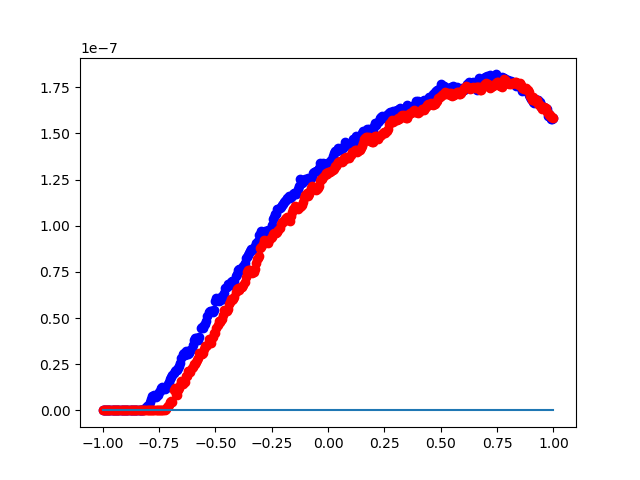

In [35]:
%matplotlib notebook

coordlist=[]

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind],ind))
    coordlist.append(points)

fig11 = plt.figure()
ax11  = fig11.add_subplot(111)

ax11.plot(Vg_fw, I_fw,'bo',picker=2)
ax11.plot(Vg_bw, I_bw,'ro',picker=2)
ax11.plot(np.linspace(min(Vg_fw),max(Vg_fw),len(Vg_fw)),np.zeros(len(Vg_fw)))
fig11.canvas.mpl_connect('pick_event', onpick)
plt.show()

In [37]:
coordlist

[((-0.810059, 1.06993e-09, 38),),
 ((-0.810059, 1.06993e-09, 38),),
 ((-0.810059, 1.06993e-09, 38),),
 ((-0.620071, 3.0425e-08, 76),),
 ((-0.620071, 3.0425e-08, 76),),
 ((-0.620071, 3.0425e-08, 76),),
 ((-0.725053, 3.84843e-10, 55),),
 ((-0.725053, 3.84843e-10, 55),),
 ((-0.725053, 3.84843e-10, 55),),
 ((-0.610058, 2.07974e-08, 78),),
 ((-0.610058, 2.07974e-08, 78),),
 ((-0.610058, 2.07974e-08, 78),),
 ((0.545052, 1.75173e-07, 309),
  (0.550046, 1.74466e-07, 310),
  (0.555062, 1.75549e-07, 311),
  (0.56007, 1.74342e-07, 312)),
 ((0.570051, 1.75042e-07, 314),
  (0.575063, 1.74071e-07, 315),
  (0.585079, 1.7362e-07, 317)),
 ((0.570051, 1.75042e-07, 314),
  (0.575063, 1.74071e-07, 315),
  (0.585079, 1.7362e-07, 317)),
 ((0.565041, 1.73253e-07, 313),
  (0.575063, 1.74071e-07, 315),
  (0.580072, 1.72849e-07, 316),
  (0.585079, 1.7362e-07, 317)),
 ((0.570044, 1.72597e-07, 314), (0.575056, 1.72397e-07, 315))]

In [38]:
th_indx_fw    = 38
tail_indx_fw  = 76
satur_indx_fw = 315

th_indx_bw    = 55
tail_indx_bw  = 78
satur_indx_bw = 315

log['vth_fw']    = Vg_fw[th_indx_fw]
log['vth_bw']    = Vg_fw[th_indx_bw]
log['is_fw']     = I_fw[satur_indx_fw]
log['is_bw']     = I_bw[satur_indx_bw]
log['vs_fw']     = Vg_fw[satur_indx_fw]
log['vs_bw']     = Vg_bw[satur_indx_bw]
log['vtail_fw']  = Vg_fw[tail_indx_fw]
log['vtail_bw']  = Vg_bw[tail_indx_bw]
log['gtail_fw']  = Gsi_fw[tail_indx_fw]
log['gtail_bw']  = Gsi_bw[tail_indx_bw]
log['vonoff_fw'] = Vg_fw[satur_indx_fw]-Vg_fw[th_indx_fw]
log['vonoff_bw'] = Vg_bw[satur_indx_bw]-Vg_fw[th_indx_bw]

## Transconductance calculation

<IPython.core.display.Javascript object>


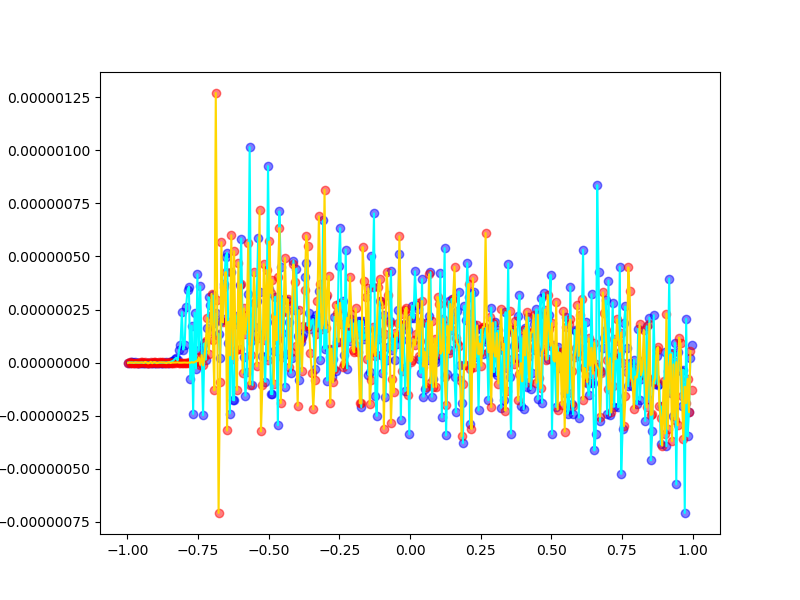

In [39]:
gm_fw  = []
Vtr_fw = []
gm_bw  = []
Vtr_bw = []

Vsd = log['biasvoltage']

# Averaging function
def average(complist, N):
    complist = np.array(complist)
    averlist = []
    counter = 0
    num = 0
    while counter < len(complist)-N:
        for i in range(N):
            num = num + complist[counter+i]
        averlist.append(num/N)
        counter = counter + N
        num = 0
    return averlist, (max(complist)-min(complist))/len(complist)*N, max(averlist)

# Calculating transconductance values
for i in range(len(I_fw)-1):
    DeltaI = I_fw[i+1]-I_fw[i]
    DeltaV = Vg_fw[i+1]-Vg_fw[i]
    gm_fw.append(DeltaI/DeltaV)
    Vtr_fw.append(DeltaV/2+Vg_fw[i])
    
for i in range(len(I_bw)-1):
    gm_bw.append((I_bw[i+1]-I_bw[i])/(Vg_bw[i+1]-Vg_bw[i]))
    Vtr_bw.append((Vg_bw[i+1]-Vg_bw[i])/2+Vg_bw[i])

# Averaging points
dev = 1


# Extracting the average lists
gm_avg_fw  = average(gm_fw,dev)
Vtr_avg_fw = average(Vtr_fw,dev)
gm_avg_bw  = average(gm_bw,dev)
Vtr_avg_bw = average(Vtr_bw,dev)

fig12, ax12 = plt.subplots(figsize=(8, 6))
ax12.plot(Vtr_fw,gm_fw,'bo', alpha = 0.5)
ax12.plot(Vtr_bw,gm_bw,'ro', alpha = 0.5)
ax12.plot(Vtr_avg_fw[0],gm_avg_fw[0],'Aqua')
ax12.plot(Vtr_avg_bw[0],gm_avg_bw[0],'Gold')
plt.show()

# Find the Voltage of peak transconductance
indx_avg_peak_fw = gm_avg_fw[0].index(gm_avg_fw[2])
indx_avg_peak_bw = gm_avg_bw[0].index(gm_avg_bw[2])

Vtr_avg_peak_fw = Vtr_avg_fw[0][indx_avg_peak_fw]
Vtr_avg_peak_bw = Vtr_avg_bw[0][indx_avg_peak_bw]

log['averaging'] = Vtr_avg_fw[1]
log['gm_fw'] = gm_avg_fw[2]*(1e-3/Vsd)
log['gm_bw'] = gm_avg_bw[2]*(1e-3/Vsd)
log['vtr_fw'] = Vtr_avg_peak_fw
log['vtr_bw'] = Vtr_avg_peak_bw


## Hysteresis

In [40]:
def Ah(V_up,G_up,V_down,G_down): # Voltage in Volts and conductance in siemens
    Go = 7.7480917310*10**(-5)
    sur_up=0
    for i in range(len(V_up)-1):
        for j in range(len(G_up)-1):
            sur_up = sur_up + (G_up[i]+G_up[i+1])*(V_up[i+1]-V_up[i])/2
    sur_down=0
    for i in range(len(V_down)-1):
        for j in range(len(G_down)-1):
            sur_down = sur_down + (G_down[i]+G_down[i+1])*(V_down[i+1]-V_down[i])/2
    return sur_up-sur_down

Hyst = Ah(Vg_fw,Gsi_fw,Vg_bw,Geh_bw) # in VS
log['hysteresis'] = Hyst

Is = abs(I_fw[satur_indx_fw]+I_bw[satur_indx_bw])/2

log['hysteresis_high'] = np.interp(5*Is/6,I_bw ,Vg_bw)-np.interp(5*Is/6,I_fw ,Vg_fw)
log['hysteresis_mid']  = np.interp(3*Is/6,I_bw ,Vg_bw)-np.interp(3*Is/6,I_fw ,Vg_fw)
log['hysteresis_low']  = np.interp(1*Is/6,I_bw ,Vg_bw)-np.interp(1*Is/6,I_fw ,Vg_fw)

## Mobility fit

<IPython.core.display.Javascript object>


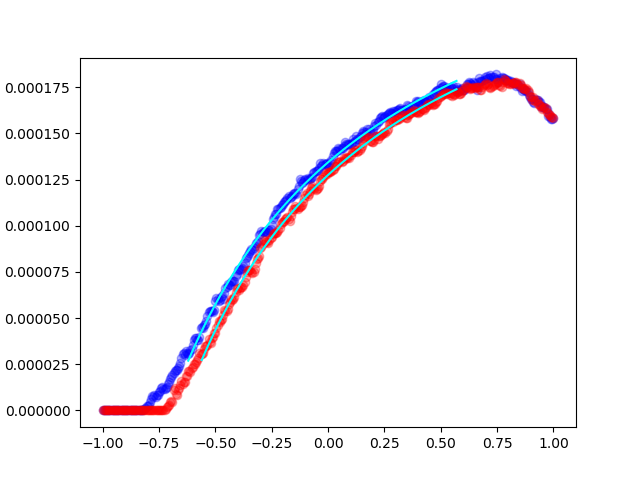

FW: k= 3323.3677076819117 +- 937.4414279512116 l= 2908.8988396548884 +- 1240.2654965148793 m= 0.7060778767099388 +- 6.986853619672973e-06
BW: k= 3368.229141085644 +- 705.0009477820151 l= 2896.2890905455606 +- 865.7905585595754 m= 0.647106680372326 +- 4.6345862493920865e-06


In [42]:
# Towards high mobility InSb nanowire devices
# Önder Gül et al 2015 Nanotechnology 26 215202
def gul(x, k, l, m) : # k=Rs; l=L^2/muC; m=Vth;
     return ((k+l/(x+m))**(-1)) 
gul_vect = np.vectorize(gul)


fwmin = 0
fwmax = 0
bwmin = 10
bwmax = 0

# Set the range for the fitting 
Vg_fit_fw = np.array(Vg_fw [(tail_indx_fw+fwmin):(satur_indx_fw+fwmax)])
G_fit_fw  = np.array(Gsi_fw[(tail_indx_fw+fwmin):(satur_indx_fw+fwmax)])
Vg_fit_bw = np.array(Vg_bw [(tail_indx_bw+bwmin):(satur_indx_bw+bwmax)])
G_fit_bw  = np.array(Gsi_bw[(tail_indx_bw+bwmin):(satur_indx_bw+bwmax)])

log['vtail_fw']  = Vg_fw[tail_indx_fw+fwmin]
log['vtail_bw']  = Vg_fw[tail_indx_bw+bwmin]
log['gtail_fw']  = Gsi_fw[tail_indx_fw+fwmin]
log['gtail_bw']  = Gsi_fw[tail_indx_bw+bwmin]

# Fit and plot
fig13 = plt.figure()
ax13  = fig13.add_subplot(111)

ax13.plot(Vg_fw, Gsi_fw,'bo', alpha=0.3, picker=2)
ax13.plot(Vg_bw, Gsi_bw,'ro', alpha=0.3, picker=2)

popt_fw, pcov_fw = opt.curve_fit(gul, Vg_fit_fw, G_fit_fw,p0=[1200, 800, 1])
ax13.plot(Vg_fit_fw, gul(Vg_fit_fw, *popt_fw), 'aqua')

popt_bw, pcov_bw = opt.curve_fit(gul, Vg_fit_bw, G_fit_bw,p0=[800, 1200, 1])
ax13.plot(Vg_fit_bw, gul(Vg_fit_bw, *popt_bw), 'aqua')

plt.show()

# Obtain the results
Lo = log['length']*1e-9

Rs_fw = popt_fw[0]
Rs_bw = popt_bw[0]
LLmuC_fw = popt_fw[1]/(1e-3/Vsd)
LLmuC_bw = popt_bw[1]/(1e-3/Vsd)
Vth_fit_fw = popt_fw[2]
Vth_fit_bw = popt_bw[2]

dRs_fw = pcov_fw[0][0]
dRs_bw = pcov_bw[0][0]
dLLmuC_fw = pcov_fw[1][1]
dLLmuC_bw = pcov_bw[1][1]
dVth_fit_fw = pcov_fw[2][2]
dVth_fit_bw = pcov_bw[2][2]

# Log the results
log['vth_fit_fw'] = Vth_fit_fw
log['vth_fit_bw'] = Vth_fit_bw
log['dvth_fit_fw'] = dVth_fit_fw
log['dvth_fit_bw'] = dVth_fit_bw
log['deltav_fw'] = log['vth_fit_fw']-log['vth_fw']
log['deltav_bw'] = log['vth_fit_bw']-log['vth_bw']
log['muc_fw'] = Lo**2/LLmuC_fw
log['muc_bw'] = Lo**2/LLmuC_bw
log['dmuc_fw'] = (Lo/LLmuC_fw)**2*dLLmuC_fw
log['dmuc_bw'] = (Lo/LLmuC_bw)**2*dLLmuC_bw
log['mu_fw']  = Lo**2/(LLmuC_fw*log['capacitance'])*10000
log['mu_bw']  = Lo**2/(LLmuC_bw*log['capacitance'])*10000
log['dmu_fw'] = Lo**2/(LLmuC_fw**2*log['capacitance'])*dLLmuC_fw*10000
log['dmu_bw'] = Lo**2/(LLmuC_bw**2*log['capacitance'])*dLLmuC_bw*10000
log['rs_fw'] = Rs_fw
log['rs_bw'] = Rs_bw
log['drs_fw'] = dRs_fw
log['drs_bw'] = dRs_bw


print ('FW: k=', Rs_fw, '+-', dRs_fw, 'l=', LLmuC_fw, '+-', dLLmuC_fw, 'm=', Vth_fit_fw, '+-', dVth_fit_fw)
print ('BW: k=', Rs_bw, '+-', dRs_bw, 'l=', LLmuC_bw, '+-', dLLmuC_bw, 'm=', Vth_fit_bw, '+-', dVth_fit_bw)



# If you are satisfied with your fit results, append data to the txt file
# Otherwise re-excecute this cell
# After some tries that you are confident the results look good append data to the txt log file

In [43]:
log

{'id': 'MQML258_BB_HB_-110_150',
 'round': '1',
 'connection': 'S13D10',
 'length': 2000,
 'width': 180,
 'capacitance': 3.609214475154021e-15,
 'location': 'mqml',
 'fridge': 'dynacoolppms',
 'lockin': '',
 'sourcemeter': 'keithley2614bsmua',
 'multimeter': '',
 'currentampl': '',
 'voltageampl': '',
 'voltdivac': 1.0,
 'voltdivdc': 1.0,
 'gain': 1,
 'timeconstant': 0,
 'sensitivity': 0,
 'frequency': 0,
 'amplitude': 0,
 'loadingdate': '20200618',
 'operator': 'Jordan',
 'degastime': 10,
 'degastempereture': 300,
 'temperature': 1.7,
 'field': 0,
 'biasvoltage': 0.001,
 'gatemax': 1,
 'gatemin': -1,
 'points': 401,
 'steps': 0.004987531172069825,
 'duration': 120,
 'sweeprate': 0.016666666666666666,
 'sweep': 'fwbw',
 'vth_fw': -0.810059,
 'vth_bw': -0.72506,
 'is_fw': 1.74071e-07,
 'is_bw': 1.72397e-07,
 'vs_fw': 0.575063,
 'vs_bw': 0.575056,
 'vtail_fw': -0.620071,
 'vtail_bw': -0.560055,
 'gtail_fw': 3.0425e-05,
 'gtail_bw': 4.5292699999999994e-05,
 'vonoff_fw': 1.385122,
 'vonoff

In [44]:
for key in log:
    print(key)

print('============================')
    
for key in log:
    print(log[key])

id
round
connection
length
width
capacitance
location
fridge
lockin
sourcemeter
multimeter
currentampl
voltageampl
voltdivac
voltdivdc
gain
timeconstant
sensitivity
frequency
amplitude
loadingdate
operator
degastime
degastempereture
temperature
field
biasvoltage
gatemax
gatemin
points
steps
duration
sweeprate
sweep
vth_fw
vth_bw
is_fw
is_bw
vs_fw
vs_bw
vtail_fw
vtail_bw
gtail_fw
gtail_bw
vonoff_fw
vonoff_bw
averaging
gm_fw
gm_bw
vtr_fw
vtr_bw
hysteresis
hysteresis_high
hysteresis_mid
hysteresis_low
vth_fit_fw
vth_fit_bw
dvth_fit_fw
dvth_fit_bw
deltav_fw
deltav_bw
muc_fw
muc_bw
dmuc_fw
dmuc_bw
mu_fw
mu_bw
dmu_fw
dmu_bw
rs_fw
rs_bw
drs_fw
drs_bw
MQML258_BB_HB_-110_150
1
S13D10
2000
180
3.609214475154021e-15
mqml
dynacoolppms

keithley2614bsmua



1.0
1.0
1
0
0
0
0
20200618
Jordan
10
300
1.7
0
0.001
1
-1
401
0.004987531172069825
120
0.016666666666666666
fwbw
-0.810059
-0.72506
1.74071e-07
1.72397e-07
0.575063
0.575056
-0.620071
-0.560055
3.0425e-05
4.5292699999999994e-05
1.385122
1.300116

## Plotting Quantum Conductance

<IPython.core.display.Javascript object>


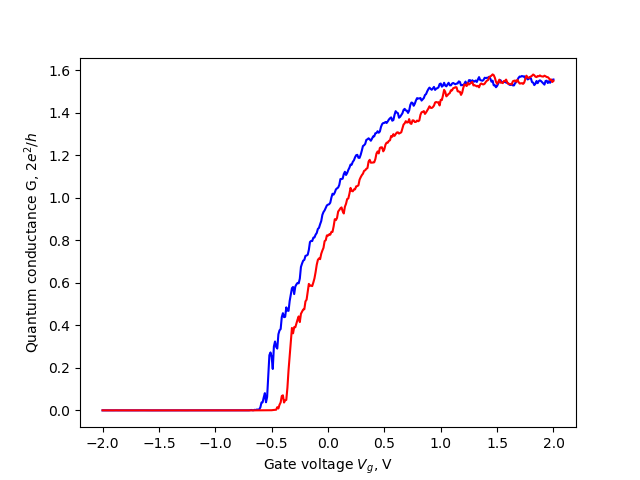

In [30]:
# Constants
Go = 7.7480917310e-5 # Quantum Conductance Unit
Vsd = 1e-3 # Source-Drain Voltage, V
Offset = 1    # Off set value to fit with DC Conductance

# load data
#data_fw = get_data_by_id(40)
#data_bw = get_data_by_id(41)

# Sweep Forward 
# Gate Voltage in V
data_fw[0][0]['name']
data_fw[0][0]['data']
Vg_fw = data_fw[0][0]['data']
# Current in A
data_fw[0][1]['name']
data_fw[0][1]['data']
I_fw = data_fw[0][1]['data']
#Calculate conductance in 2e2/h
Geh_fw =[(x / Vsd / Go) * Offset for x in I_fw]
Gsi_fw = [x * Go for x in Geh_fw]

# Sweep Backwards
# Gate Voltage in V
data_bw[0][0]['name']
data_bw[0][0]['data']
Vg_bw = data_bw[0][0]['data']
# Current in A
data_bw[0][1]['name']
data_bw[0][1]['data']
I_bw = data_bw[0][1]['data']
#Calculate conductance in 2e2/h
Geh_bw =[(x / Vsd / Go) * Offset for x in I_bw]
Gsi_bw = [x * Go for x in Geh_bw]

# Sort ascending by voltage 
# Sweep Forward 
idx = np.argsort(Vg_fw)
Vg_fw = np.array(Vg_fw)[idx]
I_fw = np.array(I_fw)[idx]
Geh_fw = np.array(Geh_fw)[idx]
Gsi_fw = np.array(Gsi_fw)[idx]
# Sweep Backwards
idx = np.argsort(Vg_bw)
Vg_bw = np.array(Vg_bw)[idx]
I_bw = np.array(I_bw)[idx]
Geh_bw = np.array(Geh_bw)[idx]
Gsi_bw = np.array(Gsi_bw)[idx]

%matplotlib notebook

coordlist=[]

fig11 = plt.figure()
ax11  = fig11.add_subplot(111)

ax11.plot(Vg_fw, Geh_fw,'b-')
ax11.plot(Vg_bw, Geh_bw,'r-')
plt.xlabel(r'Gate voltage $V_g$, V')
plt.ylabel(r'Quantum conductance G, $2e^2/h$')

fig11.canvas.draw()
#plt.savefig ('Q_conductance '+ dataid + '.png')
#plt.savefig ('Q_conductance '+ dataid + '.svg')

plt.show()